In [1]:
from keras.preprocessing.image import ImageDataGenerator

#return generator instances of the train/validation/test sets
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        #ImageDataGenerator instance for train generator
        datagen = ImageDataGenerator(
                             rescale = 1./255,  #rescale RGB scale from 0-255 to 0-1
                             rotation_range=30, #degree range for random rotation
                             shear_range = 0.2, #set shear intensity
                             zoom_range = 0.2, #set zoom range
                             horizontal_flip = True) #enable random horizontal flip
        
        #data generator for training set
        train_generator = datagen.flow_from_directory(
                                           datasetpath + '/' + 'training',
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )
        
        #ImageDataGenerator instance for validation and test generators
        datagen = ImageDataGenerator(rescale = 1./255)
        
        #data generator for validation set
        validation_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'validation',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        
        #data generator for test set
        test_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'testing',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size,
                                            shuffle = False
                                            )
        
        return train_generator, validation_generator , test_generator


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model (nb_filters = 16, img_size = 128):
    #initialize a model
    model = Sequential()
    
    #add 4 convolutional layers with specific parameters
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(nb_filters*2 , (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(nb_filters*4 , (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(nb_filters*8 , (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #add a Flatten layer and a Fully-connected neural network of our model
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'softmax'))
    
    #specify loss function, optimizer, and metrics of the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [3]:
import matplotlib.pyplot as plt

#draw accuracy/loss graph of a given model's history
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [4]:
#save model to a file
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

In [10]:
#return the label of the class with highest probability from predicted result array
def find_label(prediction_array):
        prediction = prediction_array.argmax()
        for label in train_generator.class_indices:
            if train_generator.class_indices[label] == prediction:
                return label

In [6]:
# taken from https://scikit-learn.org/stable/auto_examples
#/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
#plot confusion matrix figure
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=138, validation_data=<keras_pre..., validation_steps=39, callbacks=[<keras.ca..., epochs=200)`
  


Epoch 1/200
138/138 [==============================] - 48s 350ms/step - loss: 1.2701 - acc: 0.3989 - val_loss: 1.0375 - val_acc: 0.5686
Epoch 2/200
138/138 [==============================] - 49s 356ms/step - loss: 1.0630 - acc: 0.5342 - val_loss: 0.9003 - val_acc: 0.5948
Epoch 3/200
138/138 [==============================] - 52s 374ms/step - loss: 0.9854 - acc: 0.5816 - val_loss: 0.9126 - val_acc: 0.5964
Epoch 4/200
138/138 [==============================] - 53s 381ms/step - loss: 0.9544 - acc: 0.5834 - val_loss: 0.8471 - val_acc: 0.6552
Epoch 5/200
138/138 [==============================] - 53s 383ms/step - loss: 0.9041 - acc: 0.6167 - val_loss: 1.0311 - val_acc: 0.6258
Epoch 6/200
138/138 [==============================] - 53s 383ms/step - loss: 0.8818 - acc: 0.6243 - val_loss: 0.7693 - val_acc: 0.6912
Epoch 7/200
138/138 [==============================] - 51s 371ms/step - loss: 0.8471 - acc: 0.6592 - val_loss: 0.9690 - val_acc: 0.6389
Epoch 8/200
138/138 [===========================

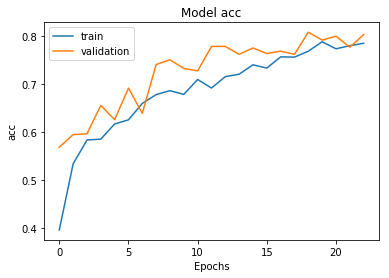

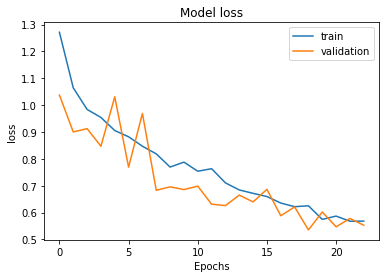

In [7]:
from keras.callbacks import EarlyStopping

#specify parameters for a model
nb_filters = 16
img_size = 128 
batch_size = 16
#create train/validation/test generators
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
#create model with the specified parameters
model = create_model(nb_filters,img_size = img_size)
#apply early_stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4)
#train the model
History = model.fit_generator(train_generator,
                  steps_per_epoch = len(train_generator),
                  nb_epoch = 200,
                  validation_data = validation_generator,
                  validation_steps = len(validation_generator),
                  callbacks=[early_stopping]
                 )
#plot accuracy and loss value graphs
draw_graph(History, 'acc')
draw_graph(History, 'loss')        


Found 309 images belonging to 4 classes.
Confusion matrix, without normalization
Accuracy: 78.32%
Loss: 0.5499005273322072
F1 score:
[0.7755102  0.69364162 0.92198582 0.76433121]


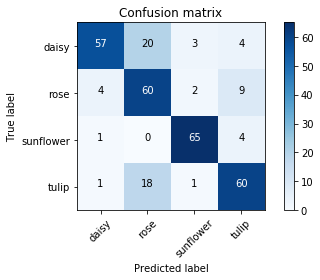

In [8]:
from sklearn.metrics import confusion_matrix,f1_score
import numpy as np

#evaluate the model with the data set from given path (for test/validation set)
def evaluate_model(model, path):
    datagen = ImageDataGenerator(rescale = 1./255)
    generator = datagen.flow_from_directory(
                                        path,
                                        target_size = (img_size, img_size),
                                        class_mode = 'categorical',
                                        shuffle = False
                                        )
    Y_pred = model.predict_generator(generator, len(generator))
    y_pred = np.argmax(Y_pred, axis = 1)
    cm = confusion_matrix(generator.classes, y_pred)
    plot_confusion_matrix(cm, generator.class_indices)
    loss, acc = model.evaluate_generator(generator, len(generator))
    print("Accuracy: {:.2f}%".format(acc * 100))
    print("Loss: {}".format(loss))
    print('F1 score:')
    print(f1_score(generator.classes, y_pred, average=None))

#show evaluation on test set
evaluate_model(model, 'dataset/testing')


Found 612 images belonging to 4 classes.
Confusion matrix, without normalization
Accuracy: 80.23%
Loss: 0.5529509642544914
F1 score:
[0.80757098 0.72997033 0.89198606 0.79151943]


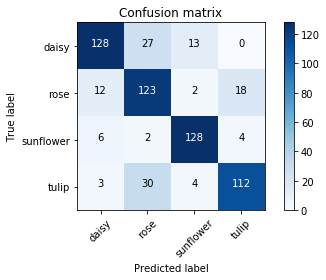

In [12]:
#show evaluation on validation set
evaluate_model(model, 'dataset/validation')

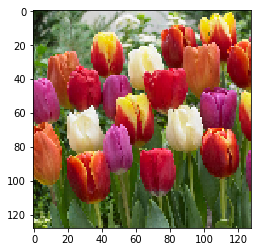

'tulip'

In [11]:
from keras.preprocessing import image
import numpy as np 

#show an image and return its prediction result
def predict_flower(model = model, image_path = 'tulip.jpg'):
    img = image.load_img(path=image_path,target_size=(128,128,3))
    plt.imshow(img)
    plt.show()
    img = np.reshape(img,[1,128,128,3])
    pred = model.predict([img])
    return find_label(pred[0])

predict_flower()

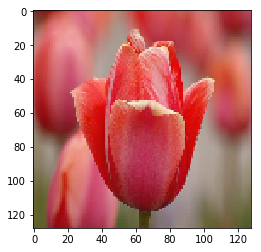

'rose'

In [22]:
from keras.preprocessing import image
import numpy as np 

def predict_flower(model = model, image_path = 'tulip.jpg'):
    img = image.load_img(path=image_path,target_size=(128,128,3))
    plt.imshow(img)
    plt.show()
    img = np.reshape(img,[1,128,128,3])
    pred = model.predict([img])
    return find_label(pred[0])

predict_flower(model, 'tulip1.jpg')